# 3D lamps Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cufflinks as cf
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset 
df = pd.read_excel("3d lamp.xlsx")
df

,Brand,price,link,Ratings,Review numbers,Good Reviews,bad Reviews,Bad Review_Reasons,Finish Type,Product Dimensions,Shade Colour,Shade Material,Colour,Materials,Item Weight(grams),Place,Manufacturer
0,‎Mels 3D,685,https://www.amazon.in/Eco-Friendly-Bio-Plastic...,5.0,2,2,0,NaN,‎Polished,‎12.5D x 12.5W x 18H,\t‎Yellow,‎Plastic,multicolor,\t‎PLA,0,"Indra Nagar, Palani, Tamil Nadu 624601",‎Mels 3D
1,Vidmahi,1899,https://www.amazon.in/dp/B0CTQLV1V5/ref=sspa_d...,3.3,3,2,1,plastic materials and Damage,‎3D Painted,‎17D x 17W x 22H,‎White,‎biodegradable,White,Biodegradable Plastic,750,"B-34, AMAN PURI, NANGLOI,, DELHI, DELHI, 110041",‎Eagle Exim
2,Generic,2250,https://www.amazon.in/3D-Printed-Eco-Friendly-...,0.0,0,0,0,NaN,3d Printed,‎12D x 20W x 27H,‎White,‎biodegradable,White,"‎Biodegradable, Plastic",750,"17/194 Pooja Apartments, Near Himmatlal Park, ...",‎Damaru Studio
3,‎Generic,1499,https://www.amazon.in/Classic-Farmhouse-Honeyc...,0.0,0,0,0,NaN,\t‎Matte,‎10D x 6W x 10H,‎Yellow,no,‎white,‎Plastic,300,"Ajai St, Kanagathara Nagar, Ashtalakshmi Nagar...",Aura 3d creations
4,‎Generic,1499,https://www.amazon.in/Modern-Office-Printed-Fu...,0.0,0,0,0,NaN,‎Painted,‎12D x 8W x 12H,no,‎Plastic,‎white,‎Plastic,300,"Ajai St, Kanagathara Nagar, Ashtalakshmi Nagar...",Aura 3d creations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GalaxyPrintsShopCo,238,https://www.etsy.com/in-en/listing/1756545503/...,5.0,24,0,0,NaN,Unfinished,no,Yellow,no,Yellow,Plastic,no,"washington, United states",GalaxyPrintsShopCo
146,GalaxyPrintsShopCo,238,https://www.etsy.com/in-en/listing/1788383635/...,5.0,24,0,0,NaN,Unfinished,no,warm white,no,warm white,Plastic,no,"washington, United states",GalaxyPrintsShopCo
147,baystory,1259,https://www.etsy.com/in-en/listing/1545251633/...,4.9,280,275,5,poor quality,Unfinished,7.6W x 11.4H,Yellow,no,Yellow,"glass,plastic",no,"California, United States",baystory
148,71things,4872,https://www.etsy.com/in-en/listing/1807001586/...,5.0,7,7,0,NaN,Polished,14D x 14W x 15H,red,Plastic,red,Plastic,no,poland,71things


### data cleaning process 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               150 non-null    object 
 1   price               150 non-null    int64  
 2   link                150 non-null    object 
 3   Ratings             150 non-null    float64
 4   Review numbers      150 non-null    int64  
 5   Good Reviews        150 non-null    int64  
 6   bad Reviews         150 non-null    int64  
 7   Bad Review_Reasons  34 non-null     object 
 8   Finish Type         147 non-null    object 
 9   Product Dimensions  150 non-null    object 
 10  Shade Colour        149 non-null    object 
 11  Shade Material      150 non-null    object 
 12  Colour              150 non-null    object 
 13  Materials           150 non-null    object 
 14  Item Weight(grams)  148 non-null    object 
 15  Place               150 non-null    object 
 16  Manufact

In [4]:
# checking for null values
df.isnull().sum()

Brand                   0
price                   0
link                    0
Ratings                 0
Review numbers          0
Good Reviews            0
bad Reviews             0
Bad Review_Reasons    116
Finish Type             3
Product Dimensions      0
Shade Colour            1
Shade Material          0
Colour                  0
Materials               0
Item Weight(grams)      2
Place                   0
Manufacturer            0
dtype: int64

In [5]:
# checking for duplicates
df.duplicated().sum()

1

In [6]:
#dropping duplicates
df=df.drop_duplicates()

In [7]:
## converting the string to lowercase
df.columns=df.columns.str.lower()

In [8]:
df.columns

Index(['brand', 'price', 'link', 'ratings', 'review numbers', 'good reviews',
       'bad reviews', 'bad review_reasons', 'finish type',
       'product dimensions', 'shade colour', 'shade material', 'colour',
       'materials', 'item weight(grams)', 'place', 'manufacturer'],
      dtype='object')

In [9]:
df['item weight(grams)'] = df['item weight(grams)'].replace('no','0')

In [10]:
df['item weight(grams)'].dtype

dtype('O')

In [11]:
df['item weight(grams)'] = df['item weight(grams)'].replace([np.inf, -np.inf], np.nan)
df['item weight(grams)'] = df['item weight(grams)'].fillna(0).astype('int64')

In [12]:
#df['price'] = pd.to_numeric(df['price'])
#df['price'] = df['price'].fillna(df['price'].mean()).astype(int)
# df['price'] = df['price'].str.replace(',', '')  # Remove commas
#df['price'] = df['price'].astype(int)  # Now convert to integer

In [13]:
df['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0       685
1      1899
2      2250
3      1499
4      1499
       ... 
145     238
146     238
147    1259
148    4872
149    4872
Name: price, Length: 149, dtype: int64>

In [14]:
df['bad review_reasons'].nunique()

10

In [15]:
df['bad review_reasons'].unique()

array([nan, 'plastic materials and Damage', 'Poor Customer service',
       'Expensive and plastic materials', 'cheap design',
       'cheap design, Expensive and plastic materials',
       'No Manual provided', 'Poor quality', 'Poor quality and Damage',
       'poor quality', 'poor quality and poor customer service'],
      dtype=object)

In [16]:
df['bad review_reasons'].fillna('no', inplace=True)

In [17]:
df['bad review_reasons'].unique()

array(['no', 'plastic materials and Damage', 'Poor Customer service',
       'Expensive and plastic materials', 'cheap design',
       'cheap design, Expensive and plastic materials',
       'No Manual provided', 'Poor quality', 'Poor quality and Damage',
       'poor quality', 'poor quality and poor customer service'],
      dtype=object)

In [18]:
## checking for duplicated values in the columns 
df['shade colour'].unique(),df['shade colour'].nunique()

(array(['\t\u200eYellow', '\u200eWhite', '\u200eYellow', 'no',
        '\t\u200ePearl White', '\u200ePearl White', '\u200eClear',
        'White,Silver,Gold,Copper,Pink,Baby Blue.', nan, 'brown', 'Yellow',
        'White', 'white', 'clear', 'white ', 'grey', 'milt Yellow',
        'Creamy', 'Blue', 'warm white', 'Red', 'saturn', 'green', 'red'],
       dtype=object),
 23)

In [19]:
df['shade colour'] = df['shade colour'].replace('\t\u200eYellow', 'Yellow')
df['shade colour'] = df['shade colour'].replace('\u200eYellow', 'Yellow')
df['shade colour'] = df['shade colour'].replace('\t\u200ePearl White', 'Pearl White')
df['shade colour'] = df['shade colour'].replace('\u200ePearl White', 'Pearl White')
df['shade colour'] = df['shade colour'].replace('\u200eClear', 'clear')
df['shade colour'] = df['shade colour'].replace('\u200eWhite', 'white')
df['shade colour'] = df['shade colour'].replace('White', 'white')
df['shade colour'] = df['shade colour'].replace('white ', 'white')

In [20]:
df['shade colour']=df['shade colour'].str.strip()
df['shade colour'].unique(),df['shade colour'].nunique()

(array(['Yellow', 'white', 'no', 'Pearl White', 'clear',
        'White,Silver,Gold,Copper,Pink,Baby Blue.', nan, 'brown', 'grey',
        'milt Yellow', 'Creamy', 'Blue', 'warm white', 'Red', 'saturn',
        'green', 'red'], dtype=object),
 16)

In [21]:
df['shade material'].unique(), df['shade material'].nunique()

(array(['\u200ePlastic', '\u200ebiodegradable', 'no', 'PLA Filament',
        '\n\u200ePLA', 'Clear', 'PETG', '\xa0PLA',
        'PLA, Bioplastic, Organic Plastic, Biodegradable, Recycled Wood, Plant',
        ' Bamboo, plastic, wood', 'R-PETG', 'Plastic', 'PLA', 'FDM\xa0',
        'Acrylic', 'PLA tough', 'pla plastic',
        'Glass, Metal, Crystal, Plastic', 'wood'], dtype=object),
 19)

In [22]:
df['shade material'] = df['shade material'].replace('\u200ePlastic','Plastic')
df['shade material'] = df['shade material'].replace('\u200ebiodegradable','biodegradable')
df['shade material'] = df['shade material'].replace('\n\u200ePLA','PLA')
df['shade material'] = df['shade material'].replace('\xa0PLA','PLA')
df['shade material'] = df['shade material'].replace('FDM\xa0','FDM')
df['shade material'] = df['shade material'].replace('no','Plastic')

In [23]:
df['shade material'] = df['shade material'].str.strip()
df['shade material'].unique(), df['shade material'].nunique()

(array(['Plastic', 'biodegradable', 'PLA Filament', 'PLA', 'Clear', 'PETG',
        'PLA, Bioplastic, Organic Plastic, Biodegradable, Recycled Wood, Plant',
        'Bamboo, plastic, wood', 'R-PETG', 'FDM', 'Acrylic', 'PLA tough',
        'pla plastic', 'Glass, Metal, Crystal, Plastic', 'wood'],
       dtype=object),
 15)

In [24]:
df['colour'].unique(), df['colour'].nunique()

(array(['multicolor', 'White', '\u200ewhite', '\u200ePearl White Shade',
        'Purple', '\u200ePearl White Shade, Walnut Wood Color',
        '\u200eWhite', '\u200eWhite , blue',
        'White,Silver,Gold,Copper,Pink,Baby Blue.', 'no', 'black', 'pink',
        '\u200eYellow', 'Yellow', 'white', 'Brown', 'grey', 'creamy',
        'Blue', 'warm white', 'saturn', 'green', 'red'], dtype=object),
 23)

In [25]:
df['colour'] = df['colour'].replace('\u200ewhite','white')
df['colour'] = df['colour'].replace('\u200ePearl White Shade','Pearl White Shade')
df['colour'] = df['colour'].replace('\u200ePearl White Shade, Walnut Wood Color','Pearl White Shade, Walnut Wood Color')
df['colour'] = df['colour'].replace('\u200eWhite','white')
df['colour'] = df['colour'].replace('\u200eWhite , blue','White , blue')
df['colour'] = df['colour'].replace('\u200eYellow','Yellow')
df['colour'] = df['colour'].replace('White','Yellow')
df['colour'] = df['colour'].replace('no','white')

In [26]:
df['colour'] = df['colour'].str.strip()
df['colour'].unique(), df['colour'].nunique()

(array(['multicolor', 'Yellow', 'white', 'Pearl White Shade', 'Purple',
        'Pearl White Shade, Walnut Wood Color', 'White , blue',
        'White,Silver,Gold,Copper,Pink,Baby Blue.', 'black', 'pink',
        'Brown', 'grey', 'creamy', 'Blue', 'warm white', 'saturn', 'green',
        'red'], dtype=object),
 18)

In [27]:
df['materials'].unique(), df['materials'].nunique()

(array(['\t\u200ePLA', 'Biodegradable Plastic',
        '\u200eBiodegradable, Plastic', '\u200ePlastic',
        'Ceramic & PLA Filament', 'PLA Filament, Wood',
        '\u200eWood,\u200ePlastic', '\n\u200ePlastic', '\xa0PLA', 'no',
        'PLA, Bioplastic, Organic Plastic, Biodegradable, Recycled Wood, Plant',
        ' Bamboo, plastic, wood', 'R-PETG', 'Plastic', 'PLA', 'FDM\xa0',
        'bio-polymer', 'Bamboo, plastic, wood', 'PLA & SS Metal',
        'Glass, Metal, Crystal, Plastic', 'pla', 'Acrylic', 'wood',
        'glass,plastic'], dtype=object),
 24)

In [28]:
df['materials']= df['materials'].replace('\t\u200ePLA','PLA')
df['materials']= df['materials'].replace('\u200eBiodegradable, Plastic','Biodegradable Plastic')
df['materials']= df['materials'].replace('\u200ePlastic','Plastic')
df['materials']= df['materials'].replace('\u200eWood,\u200ePlastic','Wood, Plastic')
df['materials']= df['materials'].replace('\xa0PLA','PLA')
df['materials']= df['materials'].replace('no','Plastic')
df['materials']= df['materials'].replace('FDM\xa0','FDM')
df['materials']= df['materials'].replace('pla','PLA')
df['materials']= df['materials'].replace('\n\u200ePlastic','Plastic')
df['materials']= df['materials'].replace( ' Bamboo, plastic, wood','Bamboo, plastic, wood')

In [29]:
df['materials']=df['materials'].str.strip()
df['materials'].unique(), df['materials'].nunique()

(array(['PLA', 'Biodegradable Plastic', 'Plastic',
        'Ceramic & PLA Filament', 'PLA Filament, Wood', 'Wood, Plastic',
        'PLA, Bioplastic, Organic Plastic, Biodegradable, Recycled Wood, Plant',
        'Bamboo, plastic, wood', 'R-PETG', 'FDM', 'bio-polymer',
        'PLA & SS Metal', 'Glass, Metal, Crystal, Plastic', 'Acrylic',
        'wood', 'glass,plastic'], dtype=object),
 16)

In [30]:
df.columns

Index(['brand', 'price', 'link', 'ratings', 'review numbers', 'good reviews',
       'bad reviews', 'bad review_reasons', 'finish type',
       'product dimensions', 'shade colour', 'shade material', 'colour',
       'materials', 'item weight(grams)', 'place', 'manufacturer'],
      dtype='object')

In [31]:
df['finish type'].value_counts(), df['item weight(grams)'].value_counts()

(finish type
 no             113
 Unfinished      12
 wood             6
 Polished         5
 \t‎Matte         2
 ‎Polished        1
 ‎3D Painted      1
 3d Printed       1
 ‎Painted         1
 Matte            1
 ‎Unfinished      1
 carved           1
 Painted          1
 Name: count, dtype: int64,
 item weight(grams)
 0       131
 750       2
 300       2
 1000      2
 650       2
 1500      1
 310       1
 1450      1
 230       1
 1200      1
 400       1
 600       1
 440       1
 260       1
 250       1
 Name: count, dtype: int64)

- converting the product dimension columns into a new table

In [32]:
import re
# Function to extract depth, width, height
def extract_dimensions(dim_string):
    values = list(map(float, re.findall(r"[\d\.]+", dim_string)))  # Extract numbers
    return values if len(values) == 3 else [None, None, None]  # Ensure 3 values

# Convert to DataFrame
df_dim = pd.DataFrame([extract_dimensions(d) for d in df['product dimensions']], columns=["product_Depth", "product_Width", "product_Height"])

print(df_dim)


     product_Depth  product_Width  product_Height
0             12.5           12.5            18.0
1             17.0           17.0            22.0
2             12.0           20.0            27.0
3             10.0            6.0            10.0
4             12.0            8.0            12.0
..             ...            ...             ...
144            NaN            NaN             NaN
145            NaN            NaN             NaN
146            NaN            NaN             NaN
147           14.0           14.0            15.0
148           14.0           14.0            15.0

[149 rows x 3 columns]


In [33]:
# handling null values 
df_dim['product_Depth'] = df_dim['product_Depth'].fillna(df_dim['product_Depth'].mean())
df_dim['product_Width'] = df_dim['product_Width'].fillna(df_dim['product_Width'].mean())
df_dim['product_Height'] = df_dim['product_Height'].fillna(df_dim['product_Height'].mean())

In [34]:
df_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_Depth   149 non-null    float64
 1   product_Width   149 non-null    float64
 2   product_Height  149 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


In [35]:
# dropping the unwanted columns 
df = df.drop(columns=['link']) #'place','finish type','item weight(grams)'])

- here i have drop this columns,  because most the data's are missing ,we can't fill this using mean.
- if we did it may leads to false prediction

In [36]:
df = df.drop(columns=['product dimensions'])
df.head()

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,shade colour,shade material,colour,materials,item weight(grams),place,manufacturer
0,‎Mels 3D,685,5.0,2,2,0,no,‎Polished,Yellow,Plastic,multicolor,PLA,0,"Indra Nagar, Palani, Tamil Nadu 624601",‎Mels 3D
1,Vidmahi,1899,3.3,3,2,1,plastic materials and Damage,‎3D Painted,white,biodegradable,Yellow,Biodegradable Plastic,750,"B-34, AMAN PURI, NANGLOI,, DELHI, DELHI, 110041",‎Eagle Exim
2,Generic,2250,0.0,0,0,0,no,3d Printed,white,biodegradable,Yellow,Biodegradable Plastic,750,"17/194 Pooja Apartments, Near Himmatlal Park, ...",‎Damaru Studio
3,‎Generic,1499,0.0,0,0,0,no,\t‎Matte,Yellow,Plastic,white,Plastic,300,"Ajai St, Kanagathara Nagar, Ashtalakshmi Nagar...",Aura 3d creations
4,‎Generic,1499,0.0,0,0,0,no,‎Painted,no,Plastic,white,Plastic,300,"Ajai St, Kanagathara Nagar, Ashtalakshmi Nagar...",Aura 3d creations


In [37]:
# adding the product dimension details to main data frame 
columns_to_add = df_dim[['product_Depth', 'product_Width','product_Height']]

# Insert each column into the desired position
for i, col in enumerate(columns_to_add.columns):
    df.insert(8 + i, col, columns_to_add[col])  # Insert at position 1, 2, 3, etc.

print("\nUpdated Main DataFrame:")
print(df)



Updated Main DataFrame:
                  brand  price  ratings  review numbers  good reviews  \
0              ‎Mels 3D    685      5.0               2             2   
1               Vidmahi   1899      3.3               3             2   
2               Generic   2250      0.0               0             0   
3              ‎Generic   1499      0.0               0             0   
4              ‎Generic   1499      0.0               0             0   
..                  ...    ...      ...             ...           ...   
145  GalaxyPrintsShopCo    238      5.0              24             0   
146  GalaxyPrintsShopCo    238      5.0              24             0   
147            baystory   1259      4.9             280           275   
148            71things   4872      5.0               7             7   
149            71things   4872      5.0               7             7   

     bad reviews            bad review_reasons  finish type  product_Depth  \
0              0    

In [38]:
 df['finish type'].value_counts()

finish type
no             113
Unfinished      12
wood             6
Polished         5
\t‎Matte         2
‎Polished        1
‎3D Painted      1
3d Printed       1
‎Painted         1
Matte            1
‎Unfinished      1
carved           1
Painted          1
Name: count, dtype: int64

In [39]:
df['finish type'].unique()

array(['\u200ePolished', '\u200e3D Painted', '3d Printed',
       '\t\u200eMatte', '\u200ePainted', 'no', 'Matte',
       '\u200eUnfinished', nan, 'Polished', 'wood', 'Unfinished',
       'carved', 'Painted'], dtype=object)

In [40]:
df['finish type'] = df['finish type'].replace('\u200ePolished','Polished')
df['finish type'] = df['finish type'].replace('\u200e3D Painted','3D Painted')
df['finish type'] = df['finish type'].replace('\t\u200eMatte','Matte')
df['finish type'] = df['finish type'].replace('3d Printed','3D Painted')
df['finish type'] = df['finish type'].replace('\u200ePainted','Painted')
df['finish type'] = df['finish type'].replace('\u200eUnfinished','Unfinished')

In [41]:
df['finish type'].value_counts()

finish type
no            113
Unfinished     13
Polished        6
wood            6
Matte           3
3D Painted      2
Painted         2
carved          1
Name: count, dtype: int64

In [42]:
df['finish type'].replace("no", pd.NA, inplace=True)

In [43]:
df['finish type'] = df['finish type'].replace('no','Polished,Matte')

In [44]:
df['finish type'].value_counts()

finish type
Unfinished    13
Polished       6
wood           6
Matte          3
3D Painted     2
Painted        2
carved         1
Name: count, dtype: int64

In [45]:
df['shade colour'].value_counts()

shade colour
no                                          41
white                                       39
Yellow                                      38
warm white                                   7
White,Silver,Gold,Copper,Pink,Baby Blue.     6
Creamy                                       3
Pearl White                                  2
clear                                        2
grey                                         2
red                                          2
brown                                        1
milt Yellow                                  1
Blue                                         1
Red                                          1
saturn                                       1
green                                        1
Name: count, dtype: int64

In [46]:
df['shade colour'].replace("no", pd.NA, inplace=True)

In [47]:
df['shade colour'].fillna(df['shade colour'].mode()[0], inplace=True)

In [48]:
df['shade colour'].value_counts()

shade colour
white                                       81
Yellow                                      38
warm white                                   7
White,Silver,Gold,Copper,Pink,Baby Blue.     6
Creamy                                       3
Pearl White                                  2
clear                                        2
grey                                         2
red                                          2
brown                                        1
milt Yellow                                  1
Blue                                         1
Red                                          1
saturn                                       1
green                                        1
Name: count, dtype: int64

In [49]:
df['item weight(grams)'].value_counts()

item weight(grams)
0       131
750       2
300       2
1000      2
650       2
1500      1
310       1
1450      1
230       1
1200      1
400       1
600       1
440       1
260       1
250       1
Name: count, dtype: int64

In [50]:
df['item weight(grams)'].fillna(df['item weight(grams)'].mean(), inplace=True)

In [51]:
df['item weight(grams)'].value_counts()

item weight(grams)
0       131
750       2
300       2
1000      2
650       2
1500      1
310       1
1450      1
230       1
1200      1
400       1
600       1
440       1
260       1
250       1
Name: count, dtype: int64

- Extracting country from the data 

In [52]:
import pandas as pd
import re

# Regular expression pattern for country names
country_pattern = re.compile(r'\b(?:India|United States|Spain|Italy|Ukraine|Denmark|Netherlands|Germany|Israel|Singapore|Japan|Lithuania|China|Turkey|Poland|Bulgaria|United Kingdom|Türkiye|France)\b', re.IGNORECASE)

# Function to extract country names
def extract_country(address):
    if not address or address.lower() in ['no', 'none', '']:
        return 'NaN'
    match = country_pattern.search(address)
    return match.group(0).title() if match else 'NaN'  # Standardize capitalization

# Create DataFrame
#df = pd.DataFrame({'place': places})

# Extract country and add to DataFrame
df['country'] = df['place'].apply(extract_country)

In [53]:
df['country'].value_counts()

country
NaN               69
India             18
United States     13
Singapore         10
Spain              6
Netherlands        4
Lithuania          4
Denmark            4
Poland             3
Germany            3
Türkiye            3
Japan              3
Ukraine            2
Israel             2
China              2
Bulgaria           1
United Kingdom     1
Italy              1
Name: count, dtype: int64

In [54]:
df['country'].dtypes

dtype('O')

In [55]:
df['country'] = df['country'].fillna("None")

In [56]:
df['country'].dtypes

dtype('O')

In [57]:
df.drop(columns=['place'],inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               149 non-null    object 
 1   price               149 non-null    int64  
 2   ratings             149 non-null    float64
 3   review numbers      149 non-null    int64  
 4   good reviews        149 non-null    int64  
 5   bad reviews         149 non-null    int64  
 6   bad review_reasons  149 non-null    object 
 7   finish type         33 non-null     object 
 8   product_Depth       148 non-null    float64
 9   product_Width       148 non-null    float64
 10  product_Height      148 non-null    float64
 11  shade colour        149 non-null    object 
 12  shade material      149 non-null    object 
 13  colour              149 non-null    object 
 14  materials           149 non-null    object 
 15  item weight(grams)  149 non-null    int64  
 16  manufacturer 

In [59]:
df.to_excel("3d lamp_cleaned data.xlsx", index=False)

In [60]:
df2=pd.read_excel('3d lamp_cleaned data.xlsx')
df2.head(2)

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,product_Depth,product_Width,product_Height,shade colour,shade material,colour,materials,item weight(grams),manufacturer,country
0,‎Mels 3D,685,5.0,2,2,0,no,Polished,12.5,12.5,18.0,Yellow,Plastic,multicolor,PLA,0,‎Mels 3D,NaN
1,Vidmahi,1899,3.3,3,2,1,plastic materials and Damage,3D Painted,17.0,17.0,22.0,white,biodegradable,Yellow,Biodegradable Plastic,750,‎Eagle Exim,NaN


In [61]:
df2['country'].unique()

array([nan, 'India', 'United States', 'Türkiye', 'Denmark',
       'United Kingdom', 'Spain', 'Poland', 'Bulgaria', 'China', 'Italy',
       'Ukraine', 'Netherlands', 'Germany', 'Israel', 'Singapore',
       'Japan', 'Lithuania'], dtype=object)

In [62]:
#df.drop(columns=['country'],inplace=True)

#### Label encoding the categorical columns in the data set

In [63]:
# df['finish type'] = df['finish type'].astype('object')
# df['brand'] = df['brand'].astype('object')
# df['shade colour'] = df['shade colour'].astype('object')

In [64]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [65]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['brand',
 'bad review_reasons',
 'finish type',
 'shade colour',
 'shade material',
 'colour',
 'materials',
 'manufacturer',
 'country']

In [66]:
df['brand']=LE.fit_transform(df['brand'])

In [74]:
df['brand']=LE.fit_transform(df['brand'])
df['finish type'] = df['finish type'].astype('str')
df['finish type']=LE.fit_transform(df['finish type'])
df['shade colour'] = LE.fit_transform(df['shade colour'])
df['shade material'] = LE.fit_transform(df['shade material'])
df['colour'] = LE.fit_transform(df['colour'])
df['materials'] = LE.fit_transform(df['materials'])
df['manufacturer'] = LE.fit_transform(df['manufacturer'])
df['country'] = LE.fit_transform(df['country'])
df['bad review_reasons']= LE.fit_transform(df['bad review_reasons'])

In [75]:
df.head(2)

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,product_Depth,product_Width,product_Height,shade colour,shade material,colour,materials,item weight(grams),manufacturer,country
0,83,685,5.00,2,2,0,7,4,12.50,12.50,18.00,5,10,12,6,0,80,9
1,62,1899,3.30,3,2,1,8,0,17.00,17.00,22.00,14,12,7,2,750,77,9


In [76]:
# for col in categorical_columns:
#     df[col] = LE.fit_transform(df[col])

## statistical Analysis

In [77]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() 

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,product_Depth,product_Width,product_Height,shade colour,shade material,colour,materials,item weight(grams),manufacturer,country
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,148.00,148.00,148.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,40.77,4356.91,3.50,61.03,60.00,0.60,6.95,1.94,15.92,15.63,30.99,10.33,9.32,11.67,8.81,80.81,40.39,9.13
std,23.55,4803.24,1.93,214.56,214.61,1.51,1.59,1.96,5.12,3.90,34.80,4.56,2.11,4.81,2.50,259.45,23.19,3.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,6.00,7.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,740.00,3.50,0.00,0.00,0.00,7.00,1.00,15.92,15.63,24.00,5.00,10.00,7.00,6.00,0.00,22.00,8.00
50%,39.00,2869.00,4.10,2.00,1.00,0.00,7.00,1.00,15.92,15.63,30.99,14.00,10.00,12.00,10.00,0.00,40.00,9.00
75%,59.00,5800.00,5.00,21.00,19.00,0.00,7.00,1.00,15.92,15.63,30.99,14.00,10.00,17.00,10.00,0.00,61.00,11.00
max,83.00,24000.00,5.00,1085.00,1085.00,10.00,10.00,8.00,47.00,31.00,320.00,14.00,14.00,17.00,15.00,1500.00,82.00,17.00


In [78]:
### checking skewness of the data 
df.skew() 

brand                 0.17
price                 1.77
ratings              -1.16
review numbers        4.47
good reviews          4.48
bad reviews           3.88
bad review_reasons   -1.85
finish type           1.91
product_Depth         2.23
product_Width         0.39
product_Height        7.88
shade colour         -0.61
shade material       -2.34
colour               -0.14
materials            -1.12
item weight(grams)    3.74
manufacturer         -0.02
country               0.16
dtype: float64

In [79]:
df.corr() 

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,product_Depth,product_Width,product_Height,shade colour,shade material,colour,materials,item weight(grams),manufacturer,country
brand,1.00,-0.00,-0.29,0.08,0.08,0.03,-0.07,0.03,0.11,-0.10,0.05,-0.16,-0.02,-0.04,0.06,0.11,0.61,0.27
price,-0.00,1.00,-0.12,-0.09,-0.08,-0.08,-0.08,-0.13,0.37,0.44,0.02,-0.04,0.08,-0.09,0.15,-0.02,0.13,-0.03
ratings,-0.29,-0.12,1.00,0.21,0.21,0.20,-0.02,0.17,-0.08,-0.04,-0.10,0.07,-0.04,-0.01,-0.07,-0.34,-0.30,0.00
review numbers,0.08,-0.09,0.21,1.00,1.00,0.06,0.01,0.17,-0.05,-0.06,-0.02,-0.23,-0.11,-0.12,-0.04,-0.07,0.01,0.21
good reviews,0.08,-0.08,0.21,1.00,1.00,0.05,0.01,0.17,-0.05,-0.06,-0.02,-0.23,-0.11,-0.12,-0.04,-0.07,0.01,0.20
bad reviews,0.03,-0.08,0.20,0.06,0.05,1.00,-0.05,0.06,-0.03,-0.03,-0.06,0.09,0.03,0.06,-0.08,0.01,-0.10,0.19
bad review_reasons,-0.07,-0.08,-0.02,0.01,0.01,-0.05,1.00,0.16,-0.04,-0.07,-0.00,0.13,0.25,0.07,0.03,0.04,-0.11,-0.16
finish type,0.03,-0.13,0.17,0.17,0.17,0.06,0.16,1.00,-0.00,-0.09,0.04,-0.04,-0.07,0.00,-0.02,-0.08,-0.05,-0.00
product_Depth,0.11,0.37,-0.08,-0.05,-0.05,-0.03,-0.04,-0.00,1.00,0.68,0.13,-0.01,-0.09,0.05,0.15,0.17,0.11,0.02
product_Width,-0.10,0.44,-0.04,-0.06,-0.06,-0.03,-0.07,-0.09,0.68,1.00,0.22,0.01,-0.06,-0.04,0.03,0.11,0.16,-0.04


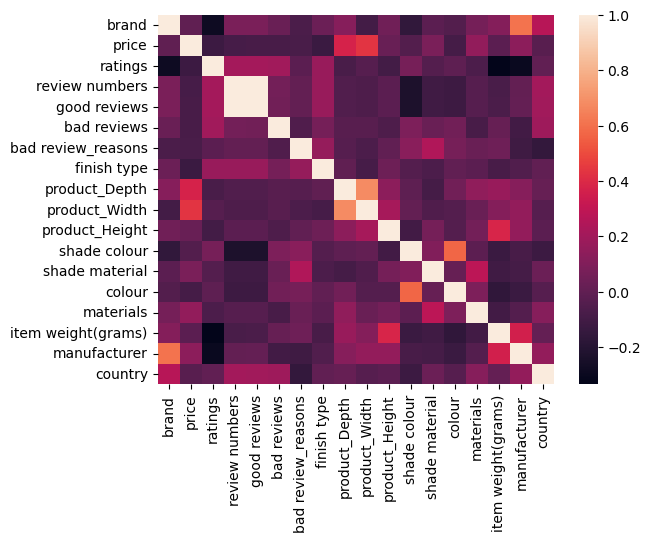

In [80]:
sns.heatmap(df.corr())
plt.show()

#### handling outliers

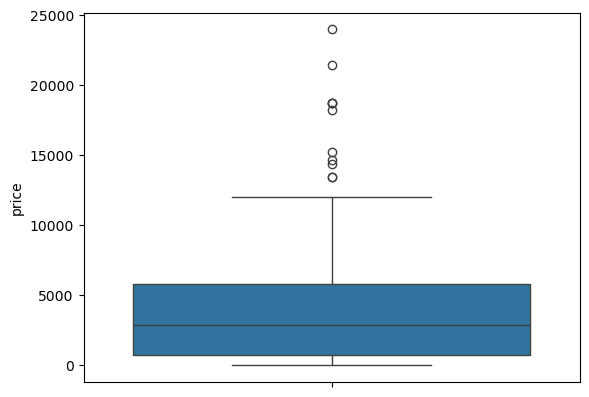

In [81]:
sns.boxplot(df['price'])
plt.show()

In [82]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3 - q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit
df= df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

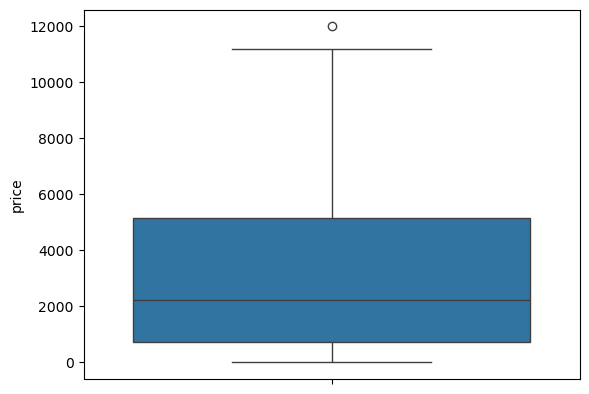

In [83]:
sns.boxplot(df['price'])
plt.show()

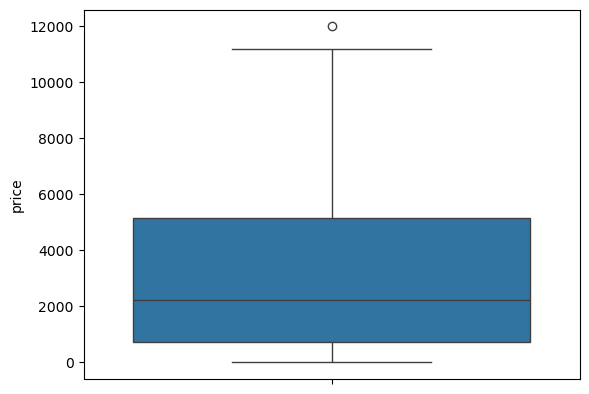

In [84]:
sns.boxplot(df['price'])
plt.show()

In [85]:
features = df.drop(columns=['price'])

In [86]:
features.columns

Index(['brand', 'ratings', 'review numbers', 'good reviews', 'bad reviews',
       'bad review_reasons', 'finish type', 'product_Depth', 'product_Width',
       'product_Height', 'shade colour', 'shade material', 'colour',
       'materials', 'item weight(grams)', 'manufacturer', 'country'],
      dtype='object')

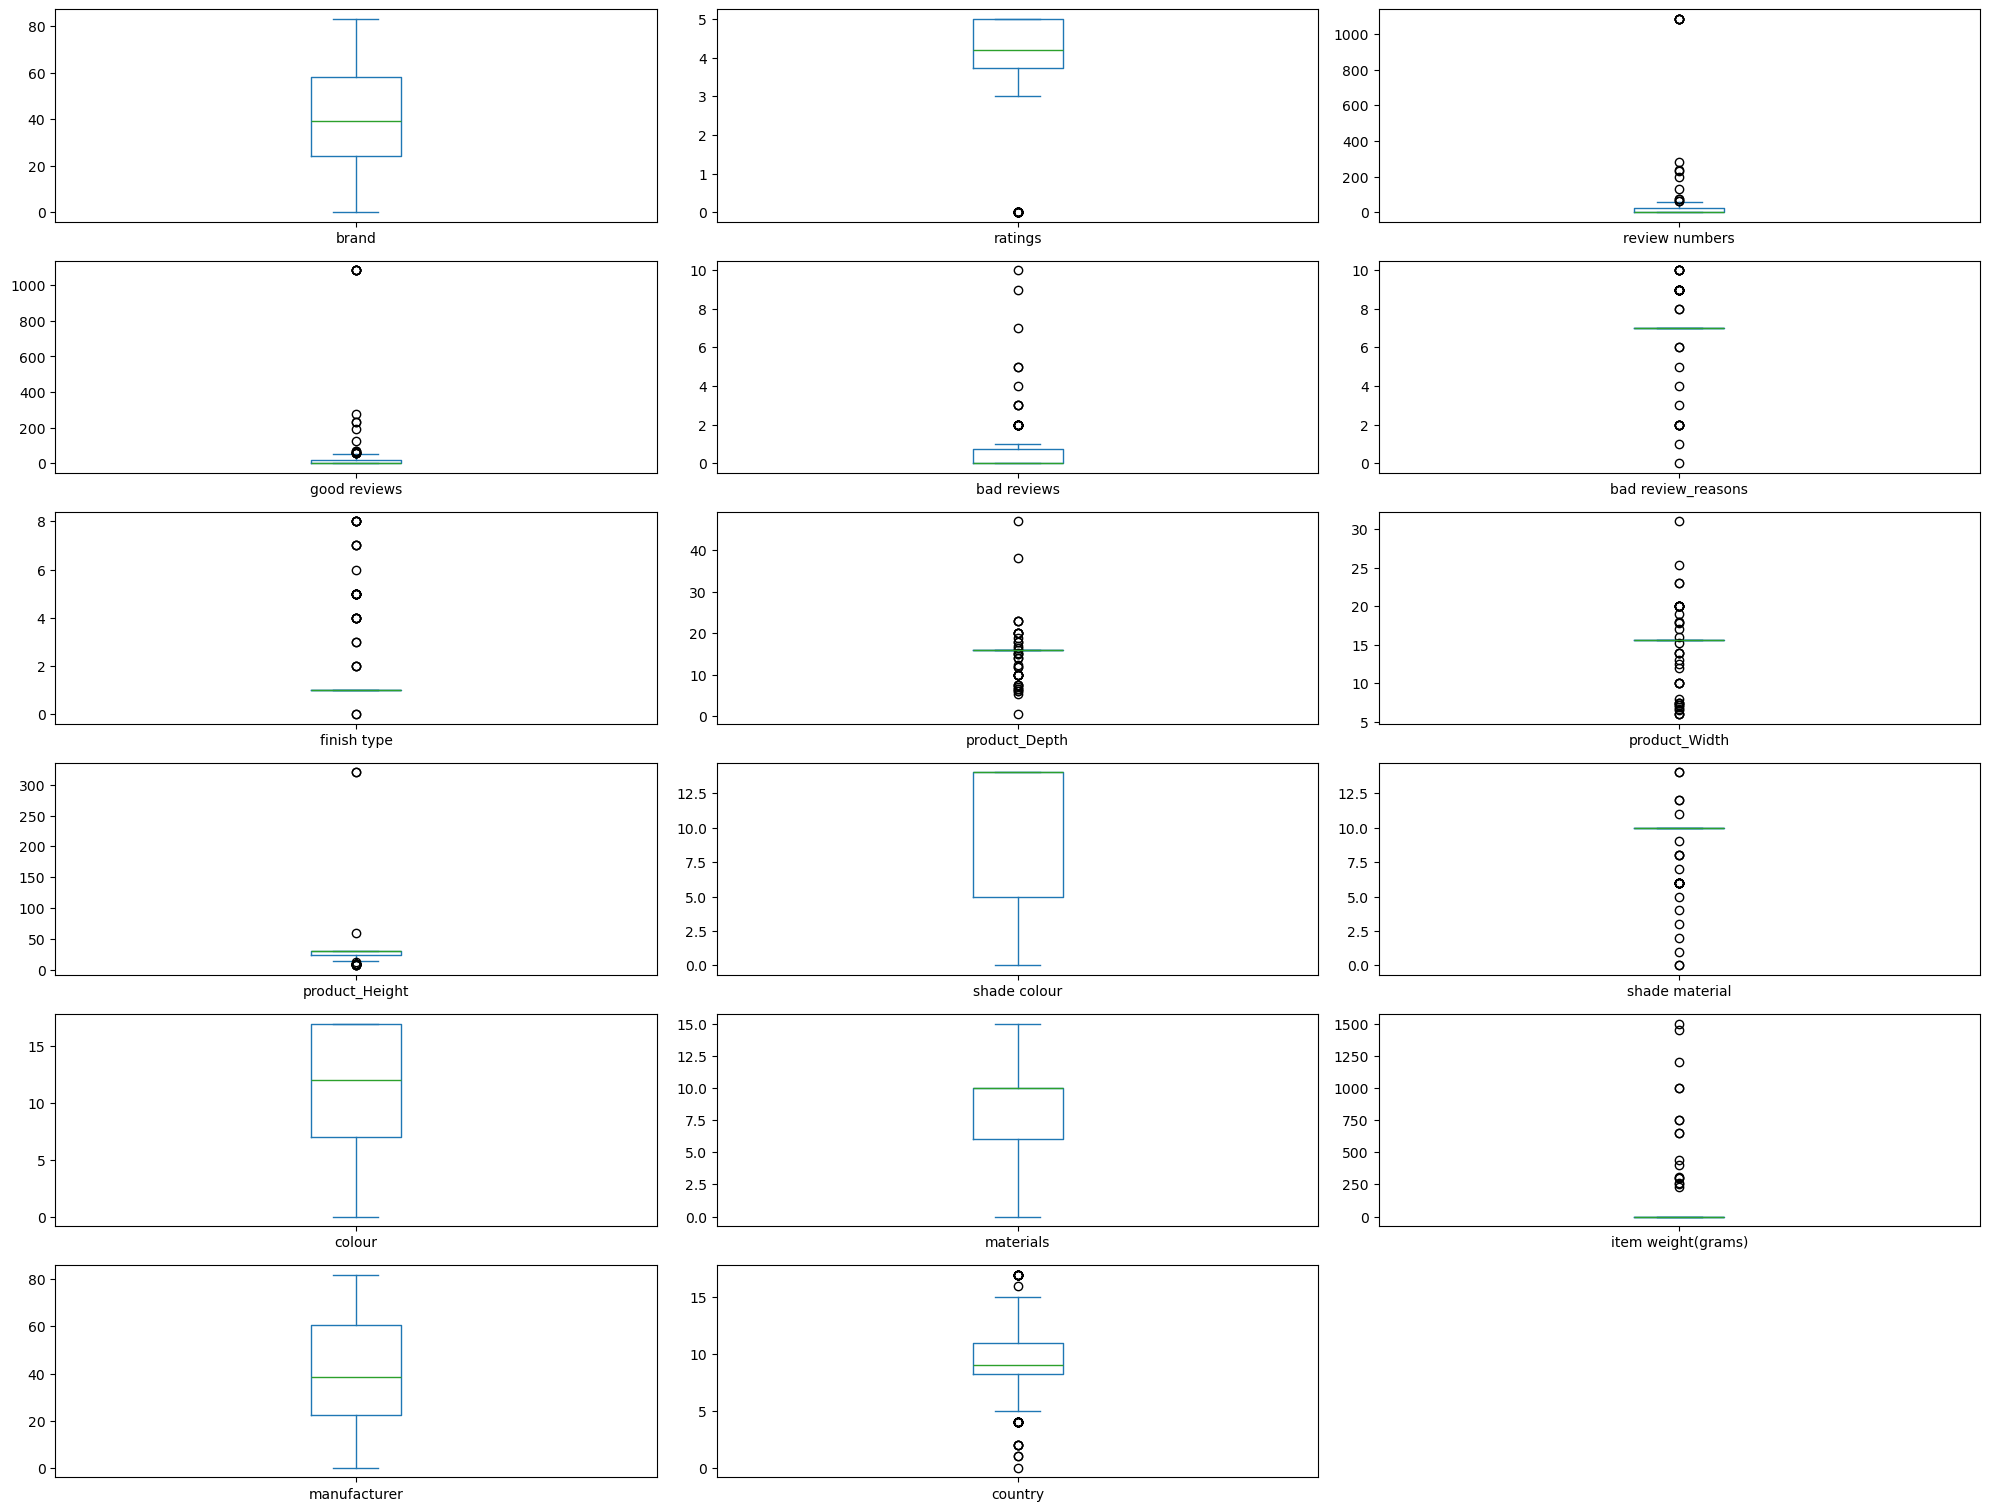

In [87]:
features.plot(kind='box', subplots=True, layout=(8,3), figsize=(20,20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [88]:
# q1 = df['review numbers'].quantile(0.25)
# q3 = df['review numbers'].quantile(0.75)
# IQR = q3 - q1
# lower_limit=q1-1.5*IQR
# upper_limit=q3+1.5*IQR
# lower_limit,upper_limit
# df= df[(df['review numbers'] >= lower_limit) & (df['review numbers'] <= upper_limit)]

# q1 = df['product_Depth'].quantile(0.25)
# q3 = df['product_Depth'].quantile(0.75)
# IQR = q3 - q1
# lower_limit=q1-1.5*IQR
# upper_limit=q3+1.5*IQR
# lower_limit,upper_limit
# df= df[(df['product_Depth'] >= lower_limit) & (df['product_Depth'] <= upper_limit)]

# q1 = df['product_Height'].quantile(0.25)
# q3 = df['product_Height'].quantile(0.75)
# IQR = q3 - q1
# lower_limit=q1-1.5*IQR
# upper_limit=q3+1.5*IQR
# lower_limit,upper_limit
# df= df[(df['product_Height'] >= lower_limit) & (df['product_Height'] <= upper_limit)]

# q1 = df['product_Width'].quantile(0.25)
# q3 = df['product_Width'].quantile(0.75)
# IQR = q3 - q1
# lower_limit=q1-1.5*IQR
# upper_limit=q3+1.5*IQR
# lower_limit,upper_limit
# df= df[(df['product_Width'] >= lower_limit) & (df['product_Width'] <= upper_limit)]

#### splitting Features and Target

In [123]:
df_cleaned=pd.read_excel('3d lamp_cleaned data.xlsx')
df_cleaned

,brand,price,ratings,review numbers,good reviews,bad reviews,bad review_reasons,finish type,product_Depth,product_Width,product_Height,shade colour,shade material,colour,materials,item weight(grams),manufacturer,country
0,‎Mels 3D,685,5.00,2,2,0,no,Polished,12.50,12.50,18.00,Yellow,Plastic,multicolor,PLA,0,‎Mels 3D,NaN
1,Vidmahi,1899,3.30,3,2,1,plastic materials and Damage,3D Painted,17.00,17.00,22.00,white,biodegradable,Yellow,Biodegradable Plastic,750,‎Eagle Exim,NaN
2,Generic,2250,0.00,0,0,0,no,3D Painted,12.00,20.00,27.00,white,biodegradable,Yellow,Biodegradable Plastic,750,‎Damaru Studio,India
3,‎Generic,1499,0.00,0,0,0,no,Matte,10.00,6.00,10.00,Yellow,Plastic,white,Plastic,300,Aura 3d creations,NaN
4,‎Generic,1499,0.00,0,0,0,no,Painted,12.00,8.00,12.00,white,Plastic,white,Plastic,300,Aura 3d creations,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,GalaxyPrintsShopCo,238,5.00,24,0,0,no,Unfinished,15.92,15.63,30.99,Yellow,Plastic,Yellow,Plastic,0,GalaxyPrintsShopCo,United States
145,GalaxyPrintsShopCo,238,5.00,24,0,0,no,Unfinished,15.92,15.63,30.99,warm white,Plastic,warm white,Plastic,0,GalaxyPrintsShopCo,United States
146,baystory,1259,4.90,280,275,5,poor quality,Unfinished,14.00,14.00,15.00,Yellow,Plastic,Yellow,"glass,plastic",0,baystory,United States
147,71things,4872,5.00,7,7,0,no,Polished,14.00,14.00,15.00,red,Plastic,red,Plastic,0,71things,Poland


In [124]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               149 non-null    object 
 1   price               149 non-null    int64  
 2   ratings             149 non-null    float64
 3   review numbers      149 non-null    int64  
 4   good reviews        149 non-null    int64  
 5   bad reviews         149 non-null    int64  
 6   bad review_reasons  149 non-null    object 
 7   finish type         33 non-null     object 
 8   product_Depth       148 non-null    float64
 9   product_Width       148 non-null    float64
 10  product_Height      148 non-null    float64
 11  shade colour        149 non-null    object 
 12  shade material      149 non-null    object 
 13  colour              149 non-null    object 
 14  materials           149 non-null    object 
 15  item weight(grams)  149 non-null    int64  
 16  manufact

In [125]:
X = df_cleaned.drop('price', axis=1)
Y = df_cleaned['price']

#### finding the importance of the features values 

In [127]:
# from sklearn.ensemble import RandomForestRegressor
# # Train Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X,Y)

# # Extract feature importance
# feature_importances = rf_model.feature_importances_
# feature_names = X.columns

# # Create a DataFrame for feature importance
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# print("Feature Importance:")
# print(feature_importance_df) 

#### scaling the features

In [90]:
X = X.drop(columns=['shade material'])

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

#### splitting the data into train and test

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

### Implementing ML Algorithms

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Decision tree regressor 

In [94]:

dtr=DecisionTreeRegressor()
parameters={"max_depth":[2,3,4,5,6,7,8,9]}
classifier=GridSearchCV(dtr,parameters,cv=5)

classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [95]:
print(classifier.best_params_)
print(classifier.best_score_)

{'max_depth': 2}
0.05740011460147285


In [99]:
model_dtr=DecisionTreeRegressor(max_depth=2)
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [100]:
#prediction
y_pred_dfc=model_dtr.predict(x_test)

In [101]:
# model evaluation
mse = mean_squared_error(y_test, y_pred_dfc)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dfc)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# R² Score
r2 = r2_score(y_test, y_pred_dfc)
print(f"R² Score: {r2*100:.4f}")

Mean Squared Error (MSE): 7615284.5182
Mean Absolute Error (MAE): 2256.8368
R² Score: 9.7418


#### Random forest Regressor

In [102]:
# Initialize and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=150, random_state=42)
model_rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# R² Score
r2 = r2_score(y_test, y_pred_rf)
print(f"R² Score: {r2*100:.4f}")

Mean Squared Error (MSE): 6973228.1766
Mean Absolute Error (MAE): 1955.8237
R² Score: 17.3516


#### Random forest regressor using grid search cv

In [128]:
rfr = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.35842266666365313


In [129]:
# Extract the best parameters
best_params = grid_search.best_params_

# Train the final model with best parameters
best_rfr = RandomForestRegressor(**best_params)
best_rfr.fit(x_train, y_train)


RandomForestRegressor(max_depth=30, n_estimators=200)

In [130]:
y_pred = best_rfr.predict(x_test)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2*100}")

Mean Squared Error: 6983044.356471899
R-Squared Score: 17.23526796949396


#### XGboost and Lightgbm 

In [103]:
import xgboost as xgb
import lightgbm as lgb

In [104]:
# XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=15, learning_rate=0.1, max_depth=3)
model_xgb.fit(x_train, y_train)

# Predict and evaluate
y_pred_xgb = model_xgb.predict(x_test)
print("XGBoost MAE:", mean_absolute_error(y_test,y_pred_xgb))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb)*100)

XGBoost MAE: 2201.04148210798
XGBoost R² Score: 12.027364442186816


In [106]:
# LightGBM
model_lgbm = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=3)
model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 13
[LightGBM] [Info] Start training from score 3348.945455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=3, objective='regression')

In [107]:
# Get the number of features from the model
print("Number of features:", len(model_lgbm.feature_importances_))
print("Feature importances:", model_lgbm.feature_importances_)

Number of features: 16
Feature importances: [65 41 25 11  8  0  5 18  0 20 22 13 12  0 47 22]


In [108]:
# Predict and evaluate
lgb_pred = model_lgbm.predict(x_test)
print("LightGBM MAE:", mean_absolute_error(y_test, lgb_pred))
print("LightGBM R² Score:", r2_score(y_test, lgb_pred)*100)

LightGBM MAE: 2083.4654497052356
LightGBM R² Score: 14.767006487755285


#### Neural Network

In [109]:
y_1=Y.astype('int32')
y_1.dtypes

dtype('int32')

In [110]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x_scaled, y_1, test_size=0.2, random_state=42)

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model with Dropout
model = Sequential([
    Dense(64, activation='relu', input_dim=x_train_nn.shape[1]),
    Dropout(0.2),  # Drop 20% of the neurons
    Dense(32, activation='relu'),
    Dropout(0.2),  # Drop 20% of the neurons
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model with additional metrics (MSE and R-squared)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


# Add Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training if no improvement for 10 epochs
    restore_best_weights=True  # Restore the model weights from the best epoch
)

# Train the model with Early Stopping
trained_model = model.fit(
    x_train_nn, y_train_nn,
    epochs=100,  # Set a high max epoch to let early stopping work
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 16101820.0000 - mae: 2822.7334 - mse: 16101820.0000 - val_loss: 24215238.0000 - val_mae: 3770.5354 - val_mse: 24215238.0000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21270932.0000 - mae: 3344.0847 - mse: 21270932.0000 - val_loss: 24212498.0000 - val_mae: 3770.1250 - val_mse: 24212498.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18383402.0000 - mae: 3109.2634 - mse: 18383402.0000 - val_loss: 24209680.0000 - val_mae: 3769.7039 - val_mse: 24209680.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23458802.0000 - mae: 3610.7820 - mse: 23458802.0000 - val_loss: 24206352.0000 - val_mae: 3769.2061 - val_mse: 24206352.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18547350.0000 - mae: 3093.0706 - mse: 18547350.0000 - val_loss: 24202308.0000 - val_mae: 3768.6172 - val_mse: 24202308.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18797704.0000 - mae:

In [112]:
from sklearn.metrics import r2_score

# Get predictions on test data
y_pred_nn = model.predict(x_test_nn)

# Calculate R-squared score
r2 = r2_score(y_test_nn, y_pred_nn)
print(f'R-squared: {r2*100}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
R-squared: 4.160648149151958
